# Exploratory Data Analysis for Machine Learning

In [312]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [198]:
#https://www.kaggle.com/goyalshalini93/car-price-prediction-linear-regression-rfe/data
df = pd.read_csv("CarPrice_Assignment.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# Data Wrangling

In [200]:
#Drop unwanted columns
df.drop(['car_ID','symboling','CarName'], axis=1, inplace=True)

In [201]:
df

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [202]:
#Handling missing data
df.isnull().sum()

fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [203]:
#Data Formatting - mpg to km/l (0.425144)
df[['citympg','highwaympg']]

,citympg,highwaympg
0,21,27
1,21,27
2,19,26
3,24,30
4,18,22
...,...,...
200,23,28
201,19,25
202,18,23
203,26,27


In [204]:
df[['citympg','highwaympg']] = df[['citympg','highwaympg']].apply(lambda x: x*0.425144)
df.rename(columns = {'citympg':'city_km_l','highwaympg':'highway_km_l'},inplace=True)

In [205]:
df[['city_km_l','highway_km_l']]

,city_km_l,highway_km_l
0,8.928024,11.478888
1,8.928024,11.478888
2,8.077736,11.053744
3,10.203456,12.754320
4,7.652592,9.353168
...,...,...
200,9.778312,11.904032
201,8.077736,10.628600
202,7.652592,9.778312
203,11.053744,11.478888


# Feature Engineering

In [206]:
df_numeric = df[df.columns[(df.dtypes != 'object') & (df.columns != 'price')] ]
df_numeric

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,city_km_l,highway_km_l
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,8.928024,11.478888
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,8.928024,11.478888
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,8.077736,11.053744
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,10.203456,12.754320
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,7.652592,9.353168
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,9.778312,11.904032
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,8.077736,10.628600
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,7.652592,9.778312
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,11.053744,11.478888


In [207]:
df_numeric.skew().sort_values(ascending=False)


compressionratio    2.610862
enginesize          1.947655
horsepower          1.405310
wheelbase           1.050214
carwidth            0.904003
curbweight          0.681398
city_km_l           0.663704
highway_km_l        0.539997
carlength           0.155954
peakrpm             0.075159
carheight           0.063123
boreratio           0.020156
stroke             -0.689705
dtype: float64

In [211]:
df_numeric[df_numeric.columns[df_numeric.skew() > 0.75]].skew().sort_values(ascending=False)

compressionratio    2.610862
enginesize          1.947655
horsepower          1.405310
wheelbase           1.050214
carwidth            0.904003
dtype: float64

Text(0.5, 1.0, 'Horse Power')

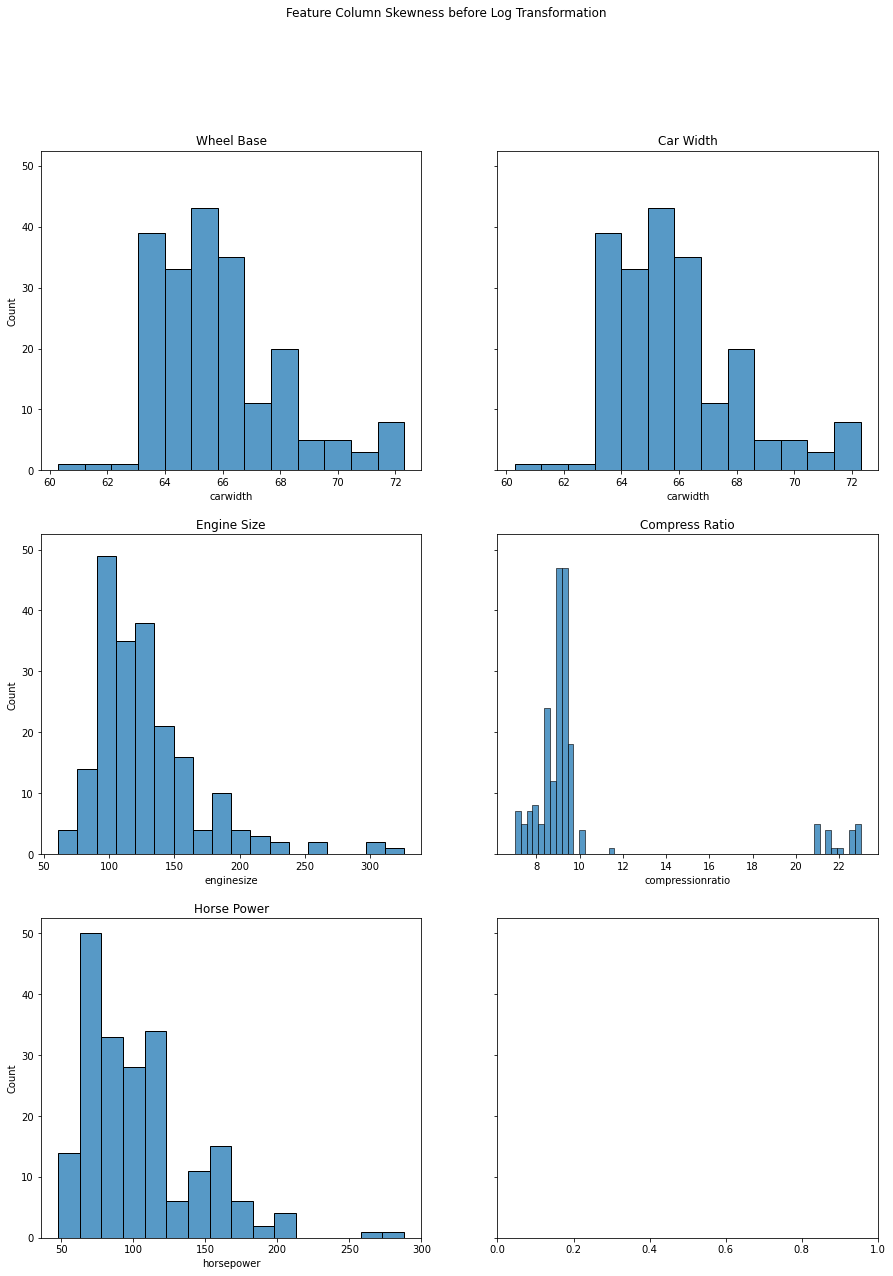

In [209]:
fig, axes = plt.subplots(3,2, figsize=(15, 20), sharey=True)
fig.suptitle('Feature Column Skewness before Log Transformation')

sns.histplot(ax=axes[0,0], x='carwidth',data=df_numeric, palette = "husl")
axes[0,0].set_title('Wheel Base')

sns.histplot(ax=axes[0,1],x='carwidth',data=df_numeric, palette = "husl")
axes[0,1].set_title('Car Width')

sns.histplot(ax=axes[1,0],x='enginesize',data=df_numeric, palette = "husl")
axes[1,0].set_title('Engine Size')

sns.histplot(ax=axes[1,1],x='compressionratio',data=df_numeric, palette = "husl")
axes[1,1].set_title('Compress Ratio')

sns.histplot(ax=axes[2,0],x='horsepower',data=df_numeric, palette = "husl")
axes[2,0].set_title('Horse Power')

In [210]:
# skewness messure > 0.75
skew_columns = df_numeric.skew().sort_values(ascending=False)
skew_columns = skew_columns.loc[skew_columns > 0.75]
skew_columns

compressionratio    2.610862
enginesize          1.947655
horsepower          1.405310
wheelbase           1.050214
carwidth            0.904003
dtype: float64

In [212]:
for col in skew_columns.index:
    df[col] = np.log10(df[col])

In [213]:
df.skew().sort_values(ascending=False)

compressionratio    2.349716
price               1.777678
wheelbase           0.883387
enginesize          0.857828
carwidth            0.813993
curbweight          0.681398
city_km_l           0.663704
highway_km_l        0.539997
horsepower          0.482838
carlength           0.155954
peakrpm             0.075159
carheight           0.063123
boreratio           0.020156
stroke             -0.689705
dtype: float64

Text(0.5, 1.0, 'Horse Power')

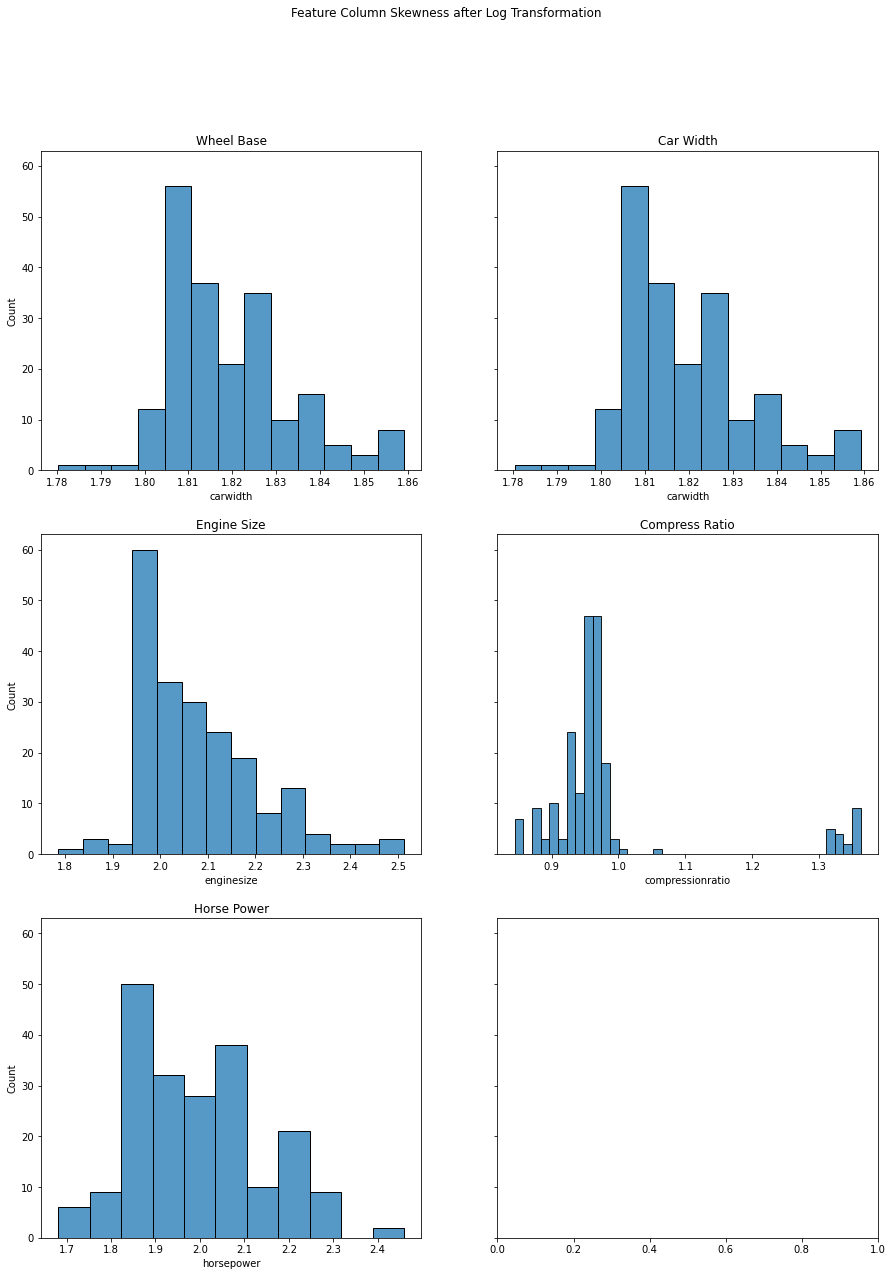

In [214]:
fig, axes = plt.subplots(3,2, figsize=(15, 20), sharey=True)
fig.suptitle('Feature Column Skewness after Log Transformation')

sns.histplot(ax=axes[0,0], x='carwidth',data=df, palette = "husl")
axes[0,0].set_title('Wheel Base')

sns.histplot(ax=axes[0,1],x='carwidth',data=df, palette = "husl")
axes[0,1].set_title('Car Width')

sns.histplot(ax=axes[1,0],x='enginesize',data=df, palette = "husl")
axes[1,0].set_title('Engine Size')

sns.histplot(ax=axes[1,1],x='compressionratio',data=df, palette = "husl")
axes[1,1].set_title('Compress Ratio')

sns.histplot(ax=axes[2,0],x='horsepower',data=df, palette = "husl")
axes[2,0].set_title('Horse Power')

# EDA

In [215]:
df

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,city_km_l,highway_km_l,price
0,gas,std,two,convertible,rwd,front,1.947434,168.8,1.806858,48.8,...,2.113943,mpfi,3.47,2.68,0.954243,2.045323,5000,8.928024,11.478888,13495.0
1,gas,std,two,convertible,rwd,front,1.947434,168.8,1.806858,48.8,...,2.113943,mpfi,3.47,2.68,0.954243,2.045323,5000,8.928024,11.478888,16500.0
2,gas,std,two,hatchback,rwd,front,1.975432,171.2,1.816241,52.4,...,2.181844,mpfi,2.68,3.47,0.954243,2.187521,5000,8.077736,11.053744,16500.0
3,gas,std,four,sedan,fwd,front,1.999131,176.6,1.820858,54.3,...,2.037426,mpfi,3.19,3.40,1.000000,2.008600,5500,10.203456,12.754320,13950.0
4,gas,std,four,sedan,4wd,front,1.997386,176.6,1.822168,54.3,...,2.133539,mpfi,3.19,3.40,0.903090,2.060698,5500,7.652592,9.353168,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,gas,std,four,sedan,rwd,front,2.037825,188.8,1.838219,55.5,...,2.149219,mpfi,3.78,3.15,0.977724,2.056905,5400,9.778312,11.904032,16845.0
201,gas,turbo,four,sedan,rwd,front,2.037825,188.8,1.837588,55.5,...,2.149219,mpfi,3.78,3.15,0.939519,2.204120,5300,8.077736,10.628600,19045.0
202,gas,std,four,sedan,rwd,front,2.037825,188.8,1.838219,55.5,...,2.238046,mpfi,3.58,2.87,0.944483,2.127105,5500,7.652592,9.778312,21485.0
203,diesel,turbo,four,sedan,rwd,front,2.037825,188.8,1.838219,55.5,...,2.161368,idi,3.01,3.40,1.361728,2.025306,4800,11.053744,11.478888,22470.0


In [216]:
df.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,city_km_l,highway_km_l,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,1.993791,174.049268,1.818712,53.724878,2555.565854,2.084694,3.329756,3.255415,0.984715,1.990500,5125.121951,10.721924,13.073696,13276.710571
std,0.025781,12.337289,0.013950,2.443522,520.680204,0.122891,0.270844,0.313597,0.122573,0.149786,476.985643,2.781352,2.927730,7988.852332
min,1.937518,141.100000,1.780317,47.800000,1488.000000,1.785330,2.540000,2.070000,0.845098,1.681241,4150.000000,5.526872,6.802304,5118.000000
25%,1.975432,166.300000,1.806858,52.000000,2145.000000,1.986772,3.150000,3.110000,0.934498,1.845098,4800.000000,8.077736,10.628600,7788.000000
50%,1.986772,173.200000,1.816241,54.100000,2414.000000,2.079181,3.310000,3.290000,0.954243,1.977724,5200.000000,10.203456,12.754320,10295.000000
75%,2.010300,183.100000,1.825426,55.500000,2935.000000,2.149219,3.580000,3.410000,0.973128,2.064458,5500.000000,12.754320,14.454896,16503.000000
max,2.082426,208.100000,1.859138,59.800000,4066.000000,2.513218,3.940000,4.170000,1.361728,2.459392,6600.000000,20.832056,22.957776,45400.000000


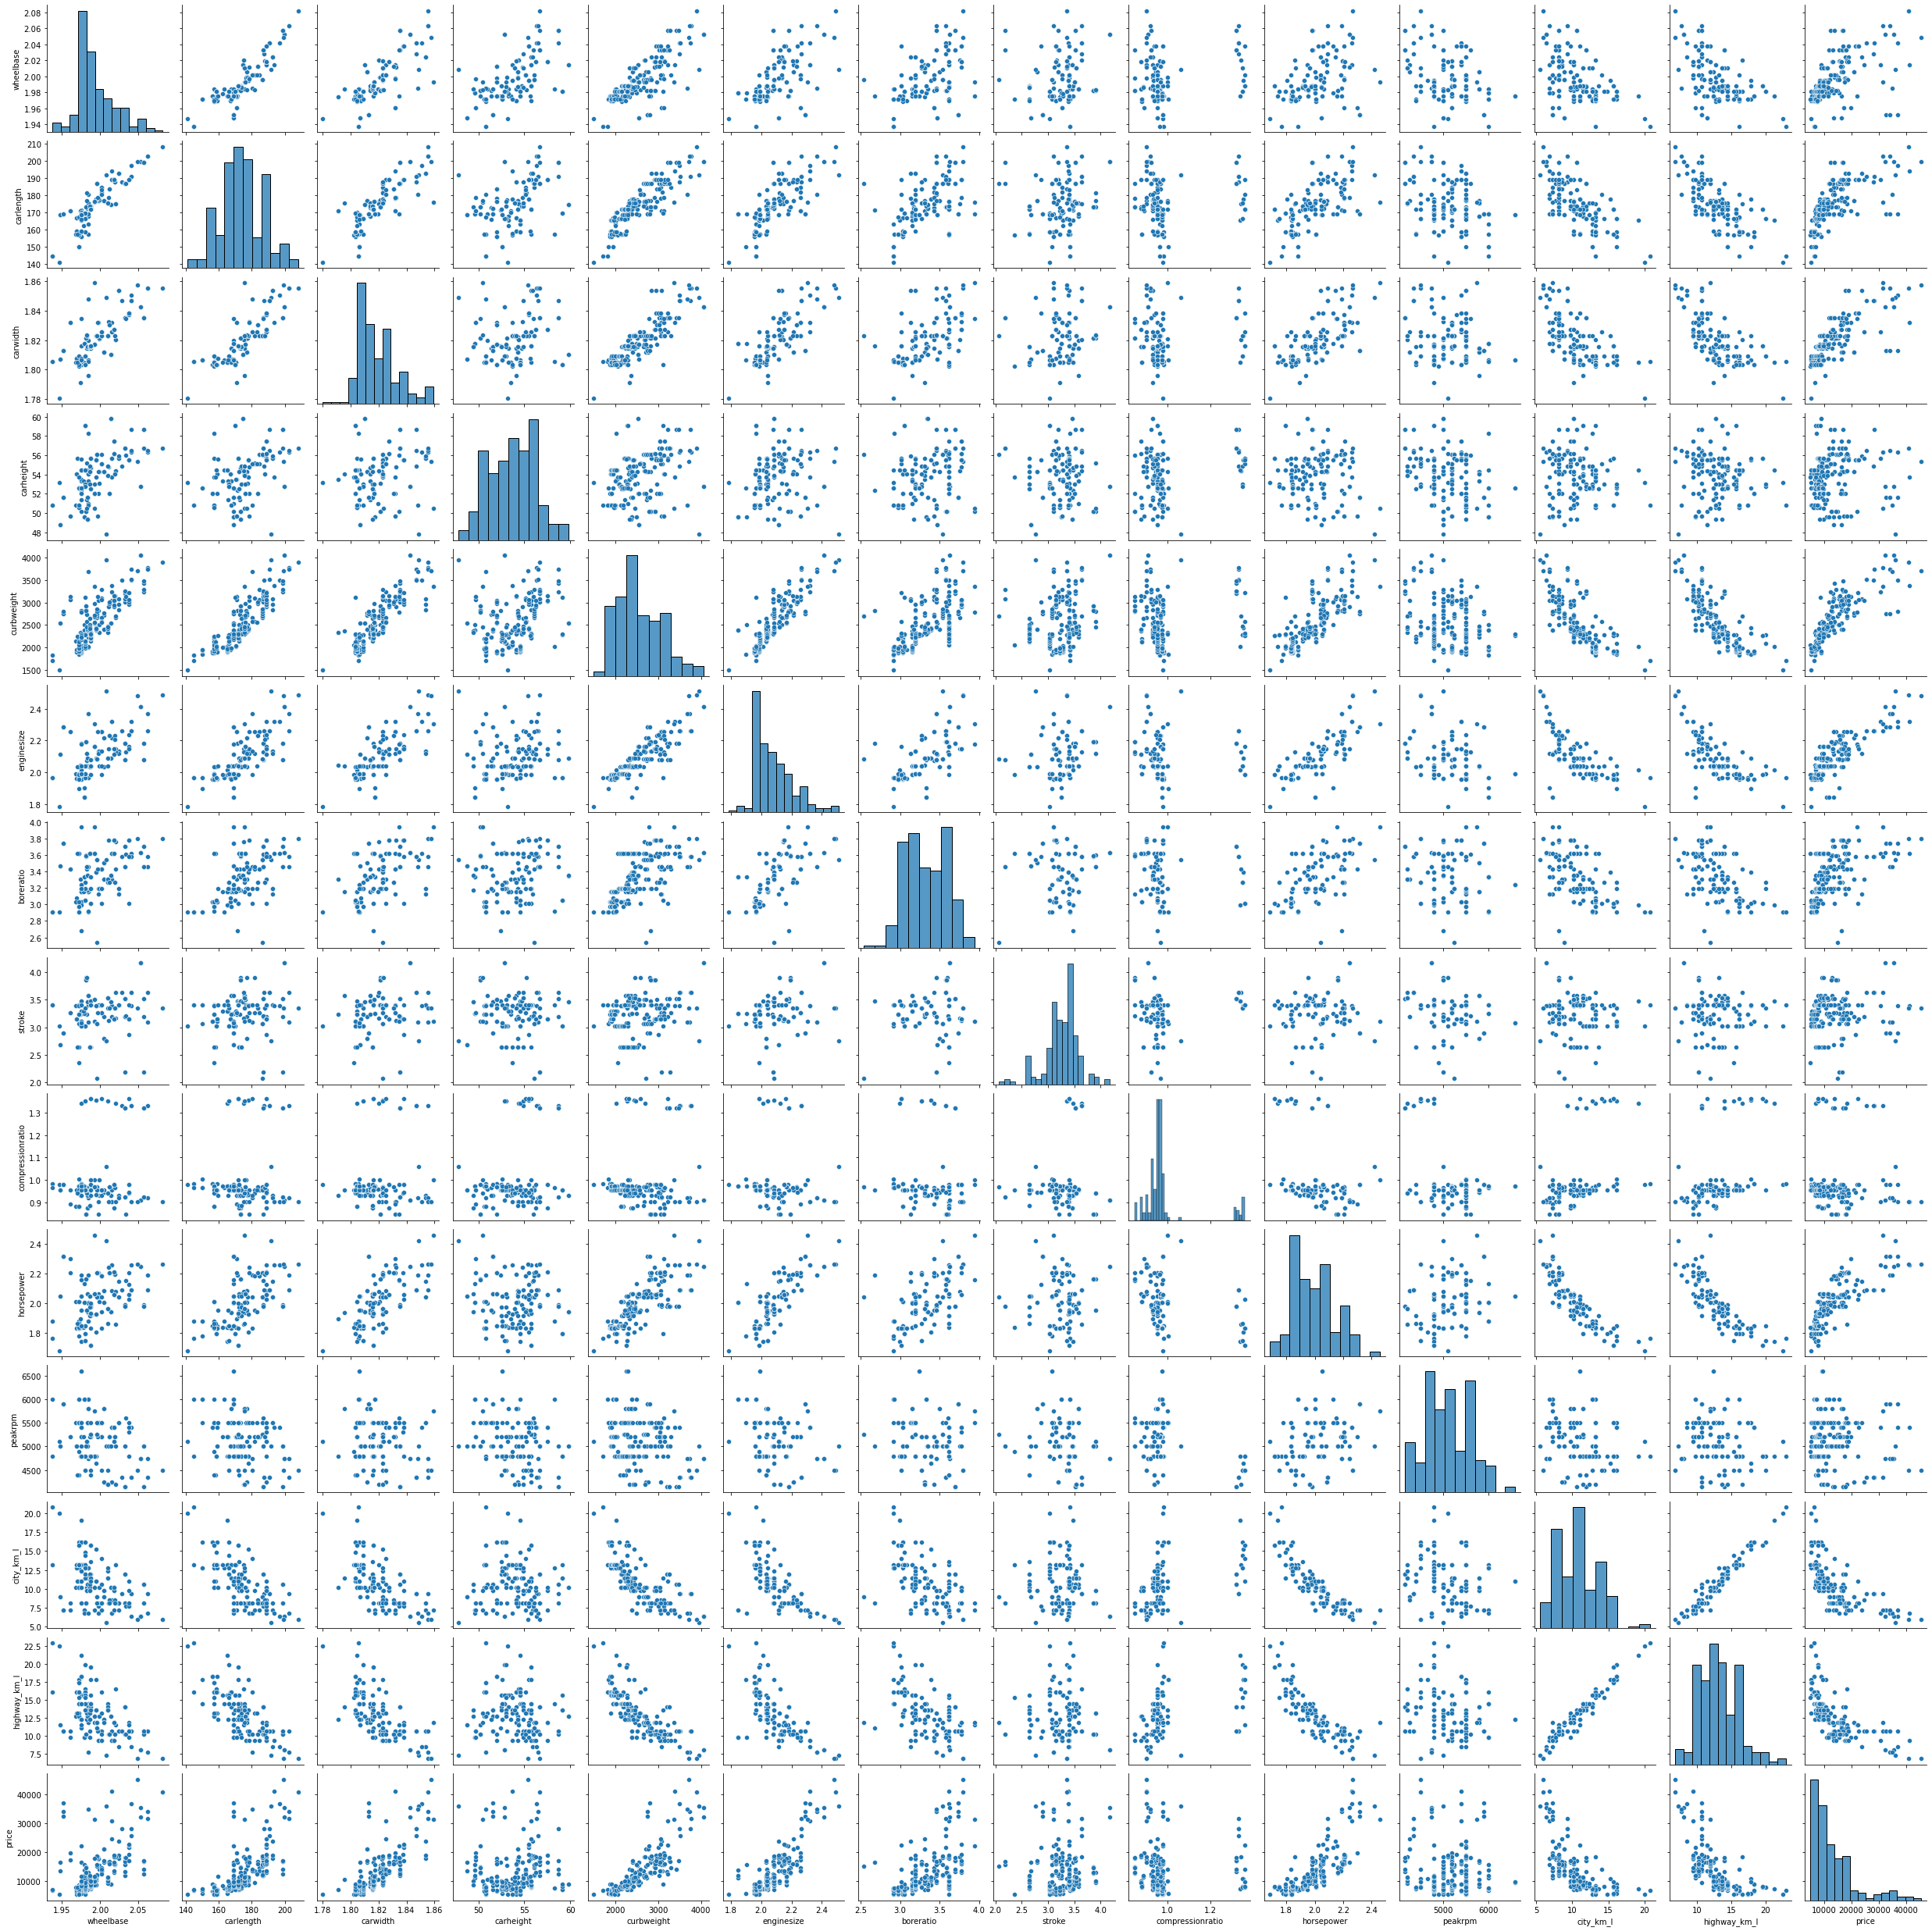

In [225]:
sns.pairplot(data=df)

# EDA Numerical Variable

## Engine Size - Price

<AxesSubplot:xlabel='enginesize', ylabel='Count'>

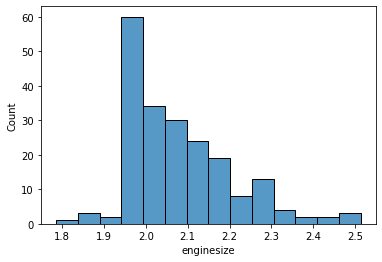

In [218]:
sns.histplot(x='enginesize',data=df)

<Figure size 1080x576 with 0 Axes>

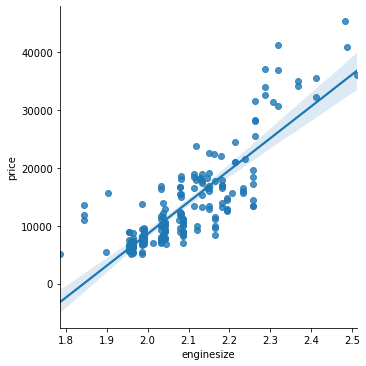

In [219]:
plt.figure(figsize=(15,8))
ax = sns.lmplot(x='enginesize', y='price', data=df)

In [404]:
Pearson_coef, p_value = stats.pearsonr(df.enginesize, df.price)
print(f'Pearson Coefficient is: {Pearson_coef} and P-value is: {p_value}')

Pearson Coefficient is: 0.8456606586416033 and P-value is: 2.913491424941682e-57


## Horsepower - Price

<AxesSubplot:xlabel='horsepower', ylabel='Count'>

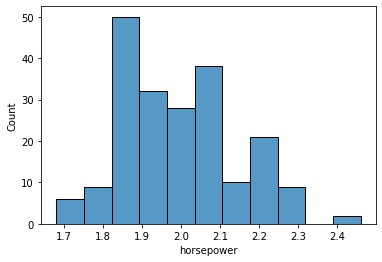

In [220]:
sns.histplot(x='horsepower',data=df)

<Figure size 1440x1080 with 0 Axes>

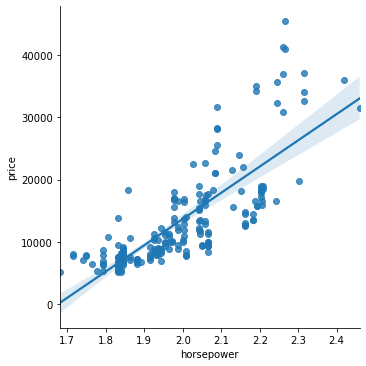

In [308]:
plt.figure(figsize=(20,15))
ax = sns.lmplot(x='horsepower', y='price', data=df)

In [405]:
Pearson_coef, p_value = stats.pearsonr(df.horsepower, df.price)
print(f'Pearson Coefficient is: {Pearson_coef} and P-value is: {p_value}')

Pearson Coefficient is: 0.7883579131818567 and P-value is: 1.0528954530448985e-44


## Peakrpm - Price

<AxesSubplot:xlabel='peakrpm', ylabel='Count'>

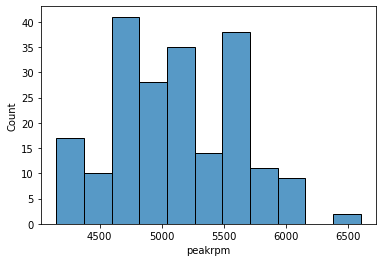

In [222]:
sns.histplot(x='peakrpm',data=df)

<Figure size 1080x576 with 0 Axes>

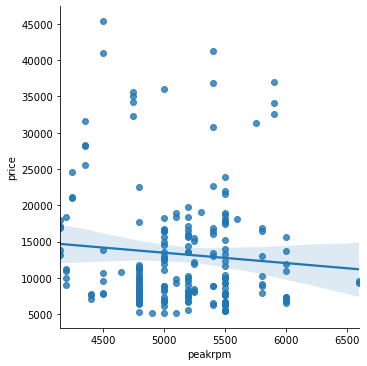

In [223]:
plt.figure(figsize=(15,8))
ax = sns.lmplot(x='peakrpm', y='price', data=df)

In [406]:
Pearson_coef, p_value = stats.pearsonr(df.peakrpm, df.price)
print(f'Pearson Coefficient is: {Pearson_coef} and P-value is: {p_value}')

Pearson Coefficient is: -0.08526715027785689 and P-value is: 0.22414123444667824


## City km/l - Price

<AxesSubplot:xlabel='city_km_l', ylabel='Count'>

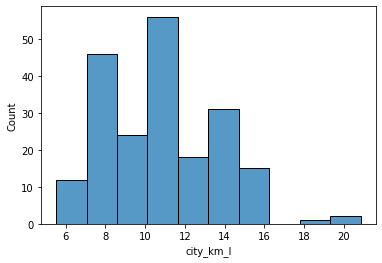

In [226]:
sns.histplot(x='city_km_l',data=df)

<Figure size 1080x576 with 0 Axes>

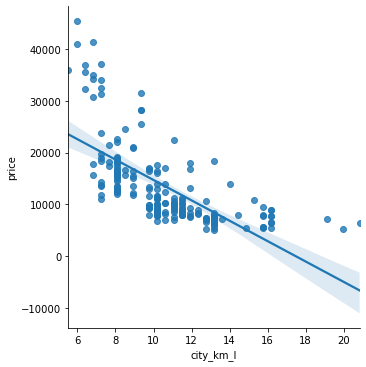

In [227]:
plt.figure(figsize=(15,8))
ax = sns.lmplot(x='city_km_l', y='price', data=df)

In [407]:
Pearson_coef, p_value = stats.pearsonr(df.city_km_l, df.price)
print(f'Pearson Coefficient is: {Pearson_coef} and P-value is: {p_value}')

Pearson Coefficient is: -0.6857513360270397 and P-value is: 7.978684249663976e-30


## Highway km/l - Price

<AxesSubplot:xlabel='highway_km_l', ylabel='Count'>

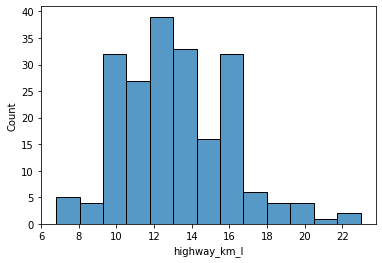

In [228]:
sns.histplot(x='highway_km_l',data=df)

<Figure size 720x504 with 0 Axes>

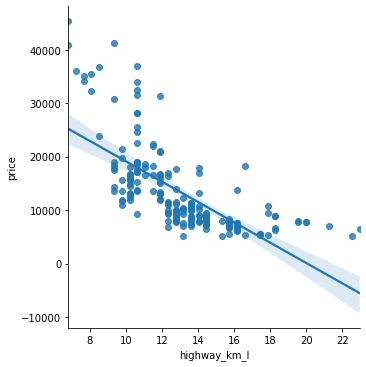

In [309]:
plt.figure(figsize=(10,7))
ax = sns.lmplot(x='highway_km_l', y='price', data=df)

In [408]:
Pearson_coef, p_value = stats.pearsonr(df.highway_km_l, df.price)
print(f'Pearson Coefficient is: {Pearson_coef} and P-value is: {p_value}')

Pearson Coefficient is: -0.6975990916465565 and P-value is: 3.230681380364601e-31


# EDA Category Variable

In [230]:
df_object = df[df.columns[df.dtypes == 'object']]
df_object

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...
200,gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [339]:
for i in df_object.columns:
    print('-------------' + i + '-------------')
    print('___________________________________ ')
    print(df_object[i].value_counts())
    print('___________________________________ ')
    print(' ')

-------------fueltype-------------
___________________________________ 
gas       185
diesel     20
Name: fueltype, dtype: int64
___________________________________ 
 
-------------aspiration-------------
___________________________________ 
std      168
turbo     37
Name: aspiration, dtype: int64
___________________________________ 
 
-------------doornumber-------------
___________________________________ 
four    115
two      90
Name: doornumber, dtype: int64
___________________________________ 
 
-------------carbody-------------
___________________________________ 
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
___________________________________ 
 
-------------drivewheel-------------
___________________________________ 
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
___________________________________ 
 
-------------enginelocation-------------
___________________________________ 
front    20

## Fuel Type

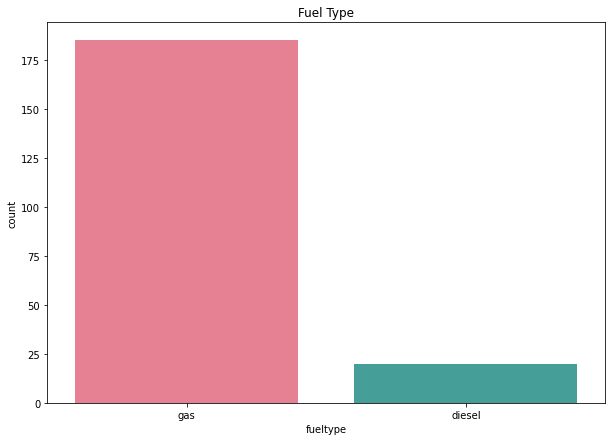

In [311]:
plt.figure(figsize=(10,7))
ax = sns.countplot( x='fueltype', data=df, palette = "husl").set_title('Fuel Type')


## Aspiration

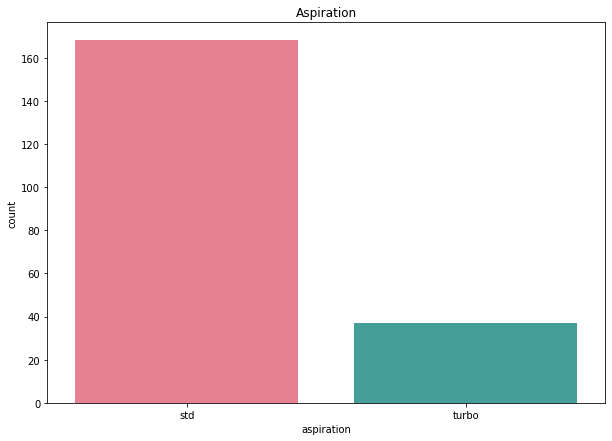

In [292]:
plt.figure(figsize=(10,7))
ax = sns.countplot( x='aspiration', data=df, palette = "husl").set_title('Aspiration')


## Door Number

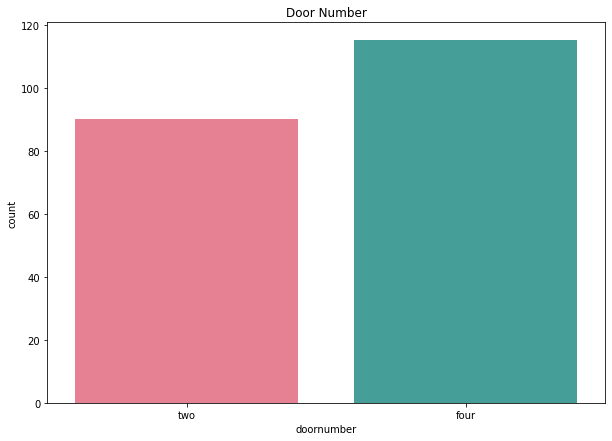

In [293]:
plt.figure(figsize=(10,7))
ax = sns.countplot( x='doornumber', data=df, palette = "husl").set_title('Door Number')



## Car Body

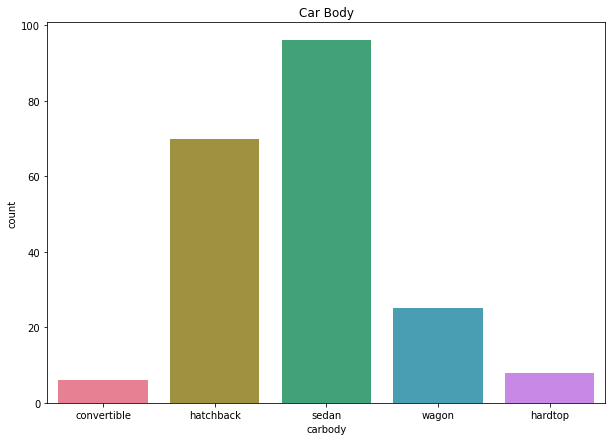

In [294]:
plt.figure(figsize=(10,7))
ax = sns.countplot( x='carbody', data=df, palette = "husl").set_title('Car Body')



## Drive Wheel

Text(0.5, 1.0, 'Drive Wheel')

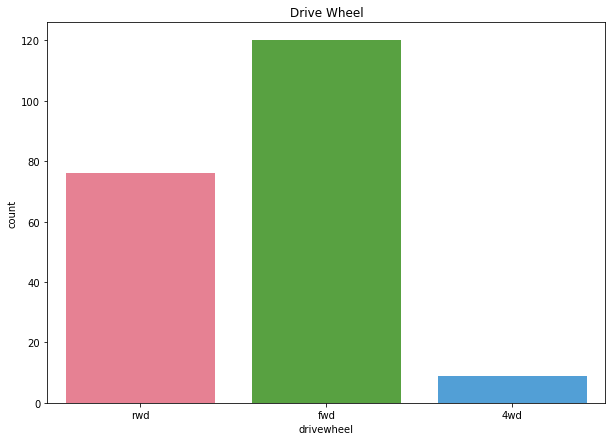

In [304]:
plt.figure(figsize=(10,7))
sns.countplot(x='drivewheel',data=df, palette = "husl").set_title('Drive Wheel')


## Engine Type

Text(0.5, 1.0, 'Engine Type')

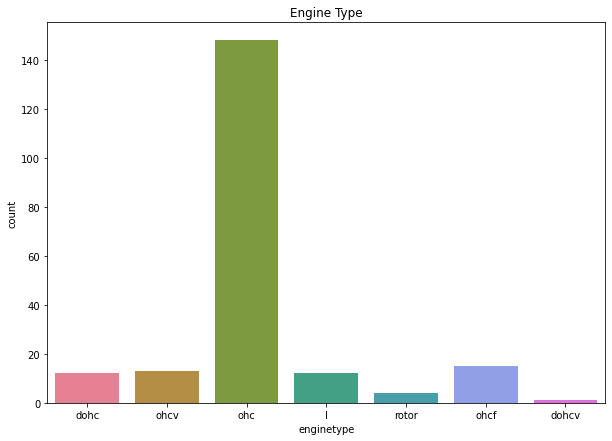

In [305]:
plt.figure(figsize=(10,7))
sns.countplot(x='enginetype',data=df, palette = "husl").set_title('Engine Type')

## Cylinder Number

Text(0.5, 1.0, 'Cylinder Number')

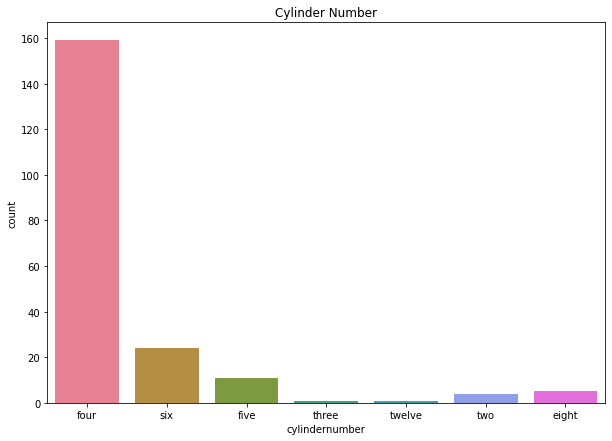

In [322]:
plt.figure(figsize=(10,7))
sns.countplot(x='cylindernumber',data=df, palette = "husl").set_title('Cylinder Number')


## Fuel Type - Price

In [328]:
df.groupby('fueltype')['price'].agg(['mean', 'min', 'max'])

,mean,min,max
fueltype,,,
diesel,15838.1500,7099.0,31600.0
gas,12999.7982,5118.0,45400.0


<AxesSubplot:xlabel='fueltype', ylabel='price'>

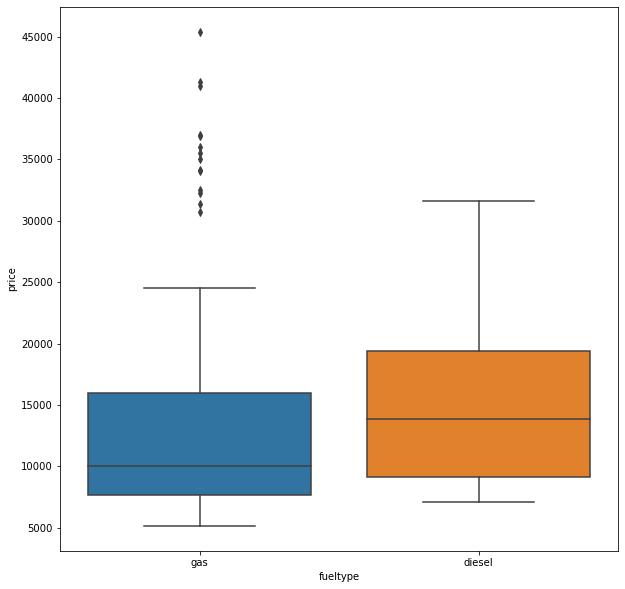

In [329]:
plt.figure(figsize=(10,10))
sns.boxplot(x='fueltype', y='price', data=df)

## Drive Wheel - Price

In [317]:
df.groupby('drivewheel')['price'].agg(['mean', 'min', 'max'])

,mean,min,max
drivewheel,,,
4wd,11087.463000,7603.0,17859.167
fwd,9239.308333,5118.0,23875.000
rwd,19910.809211,6785.0,45400.000


<AxesSubplot:xlabel='drivewheel', ylabel='price'>

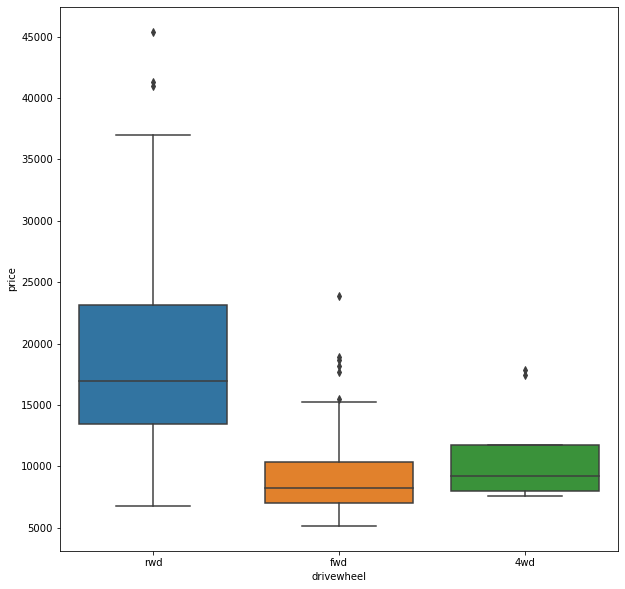

In [320]:
plt.figure(figsize=(10,10))
sns.boxplot(x='drivewheel', y='price', data=df)

## Aspiration - Price

In [326]:
df.groupby('aspiration')['price'].agg(['mean', 'min', 'max'])

,mean,min,max
aspiration,,,
std,12611.270833,5118.0,45400.0
turbo,16298.166676,7689.0,31600.0


<AxesSubplot:xlabel='aspiration', ylabel='price'>

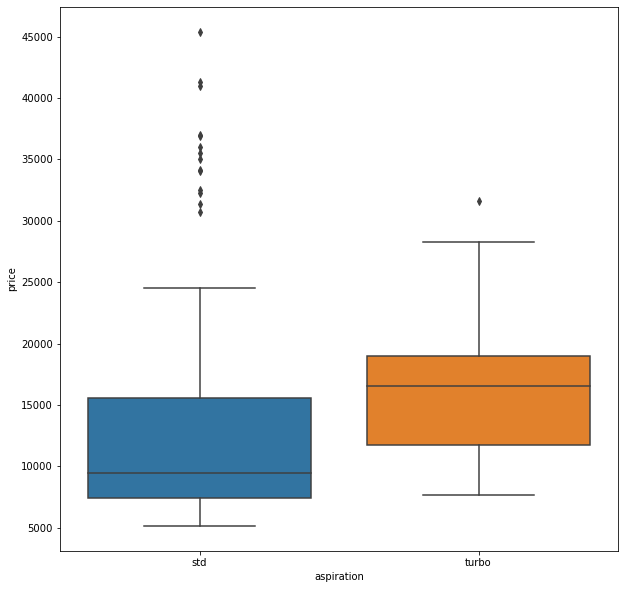

In [334]:
plt.figure(figsize=(10,10))
sns.boxplot(x='aspiration', y='price', data=df)

## Engine Type

In [335]:
df.groupby('enginetype')['price'].agg(['mean', 'min', 'max'])

,mean,min,max
enginetype,,,
dohc,18116.416667,9298.0,35550.0
dohcv,31400.500000,31400.5,31400.5
l,14627.583333,5151.0,18150.0
ohc,11574.048426,5195.0,41315.0
ohcf,13738.600000,5118.0,37028.0
ohcv,25098.384615,13499.0,45400.0
rotor,13020.000000,10945.0,15645.0


<AxesSubplot:xlabel='enginetype', ylabel='price'>

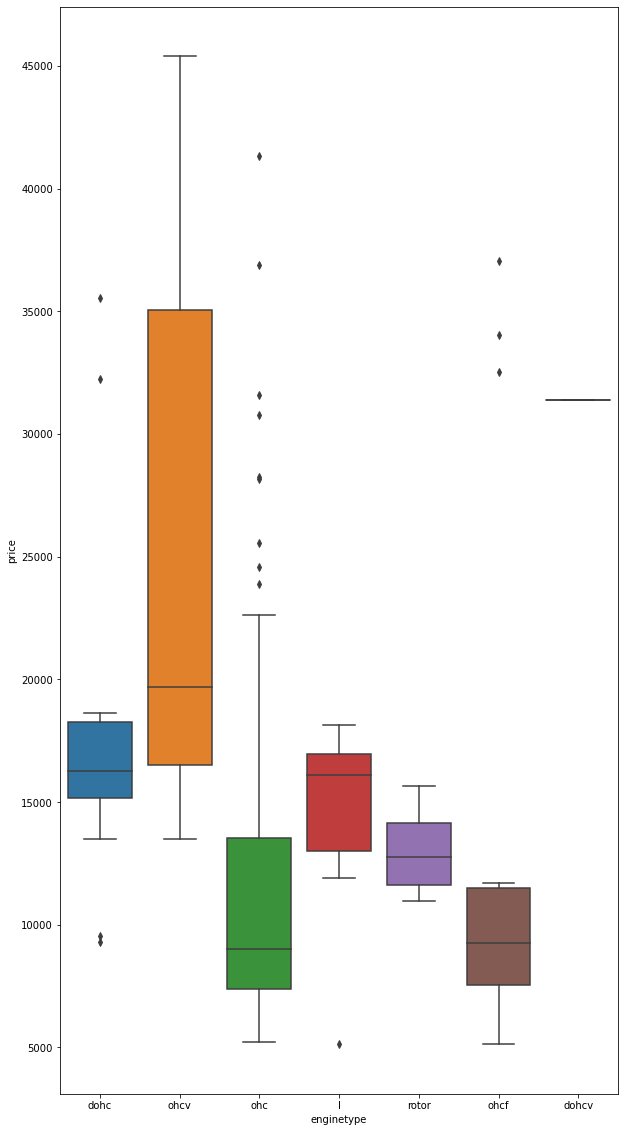

In [336]:
plt.figure(figsize=(10,20))
sns.boxplot(x='enginetype', y='price', data=df)

## Cylinder Number - Price

In [330]:
df.groupby('cylindernumber')['price'].agg(['mean', 'min', 'max'])

,mean,min,max
cylindernumber,,,
eight,37400.100000,31400.5,45400.0
five,21630.469727,13295.0,31600.0
four,10285.754717,5118.0,22625.0
six,23671.833333,13499.0,41315.0
three,5151.000000,5151.0,5151.0
twelve,36000.000000,36000.0,36000.0
two,13020.000000,10945.0,15645.0


<AxesSubplot:xlabel='cylindernumber', ylabel='price'>

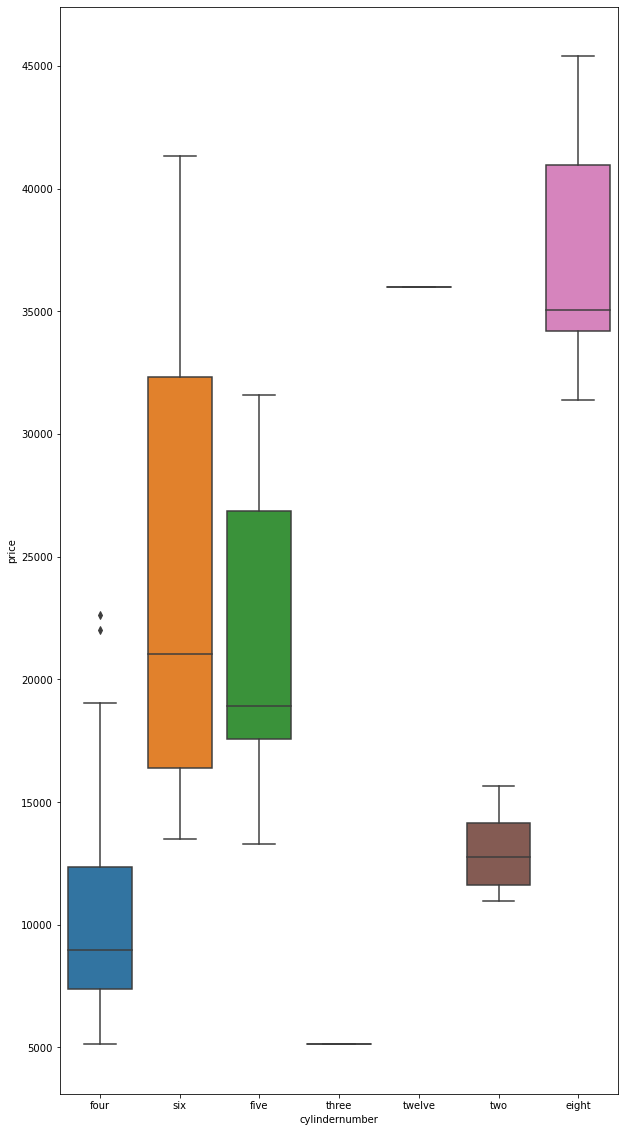

In [343]:
plt.figure(figsize=(10,20))
sns.boxplot(x='cylindernumber', y='price', data=df)

# Hypothesis Testing

## Hypothesis I - Chi Square Test
#### Null Hypothesis (H0): There is no significant association between Categorise 'Fuel Type' and 'Aspiration'.
#### Alternative Hypothesis (Ha): There is evidence of significant association between Categorise 'Fuel Type' and 'Aspiration', both categorise are not independant.

## Hypothesis II - T-test
#### Null Hypothesis (H0): There is no significant difference between 'Engine Size'  and 'Horse Power'.
#### Alternative Hypothesis (Ha): There is significant difference between 'Engine Size' and 'Horse Power'.

## Hypothesis III - T-test
#### Null Hypothesis (H0): There is no significant difference between 'Stroke'  and 'Bore Ratio'.
#### Alternative Hypothesis (Ha): There is significant difference between 'Stroke'  and 'Bore Ratio'.

In [395]:
from scipy.stats import ttest_ind
ttest_ind(df.stroke, df.boreratio)


Ttest_indResult(statistic=-2.568760698249295, pvalue=0.010560971300206863)

# Results

##### The p-value is 0.010560971300206863 which is smaller than 0.05. The Null Hypothesis (H0) is rejected and the Alternative Hypothesis is accepted (Ha). As a result there is significant difference between mean of the varaibles